In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
import warnings

warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv("../../datasets/house-prices-advanced-regression-techniques/train.csv")
data.sample(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
367,368,80,RL,101.0,9150,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,165000
428,429,20,RL,64.0,6762,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2007,New,Partial,195400
1037,1038,60,RL,NaN,9240,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,287000
1027,1028,20,RL,71.0,9520,Pave,NaN,IR1,HLS,AllPub,...,0,NaN,NaN,NaN,0,4,2008,New,Partial,293077
1174,1175,70,RL,80.0,16560,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2006,WD,Normal,239000


In [3]:
#informacion del dataset 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [4]:
#revision de datos nulos 
data.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [5]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


<Axes: >

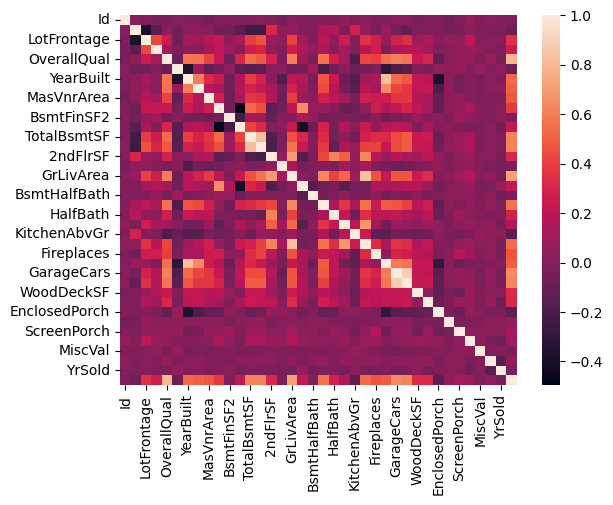

In [6]:
#revisar correlaciones 
sns.heatmap(data.select_dtypes(include=['float64','int64']).corr())

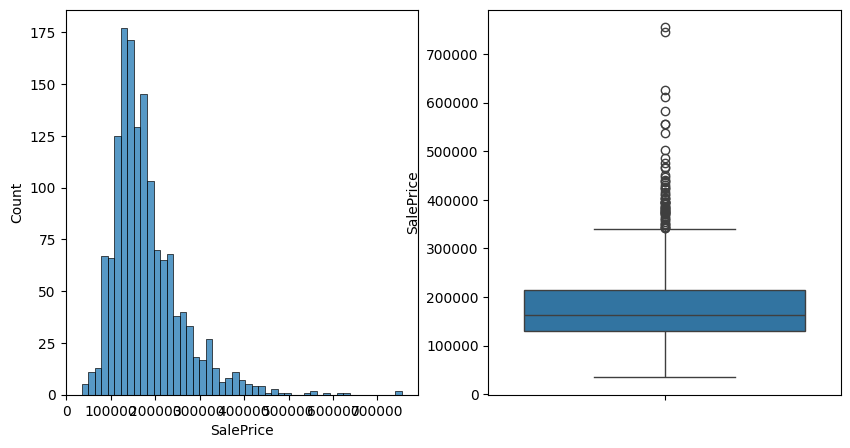

In [28]:
fig,ax = plt.subplots(1,2,figsize=(10,5))

#histograma precios 
sns.histplot(data=data,x='SalePrice',ax=ax[0])
sns.boxplot(data=data,y='SalePrice',ax=ax[1])
plt.show()

<b>comentarios</b>: Segun el metodo de calculo de valores atipicos de rango intercuartil, el calculo detecta que a partir de valores de 340037.5 son valores de casa atipicos.

In [29]:
# detectar valores atipicos!
def iqr_outlier(data,column):
    q3 = np.quantile(data[column],0.75)
    q1 = np.quantile(data[column],0.25)
    iqr = q3 - q1 

    ls = q3 + iqr * 1.5
    li = q1 - iqr * 1.5
    print(f"""
        Limite superior : {ls}
        Limite inferior : {li}
    """)

    return data.loc[(data[column]>li)&(data[column]<ls),]
    

In [15]:
#remover valores nulos 
remove_cols = []
for col in data.columns:
    if data[col].isnull().sum()>0:
        remove_cols.append(col)
print(f"Columnas para remover : {remove_cols}")

Columnas para remover : ['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']


In [30]:
#eliminar columnas con valores nulos
data_clean = data.drop(columns = remove_cols,axis=1) 
data_clean = iqr_outlier(data_clean,'SalePrice')

#revisar si hay duplicados 
print(f"""Duplicados >>
    total : {data_clean.duplicated().sum()}
""")

#Elimar columna de Id
data_clean = data_clean.drop(['Id'],axis=1)


        Limite superior : 340037.5
        Limite inferior : 3937.5
    
Duplicados >>
    total : 0



In [19]:
data_clean.head()

,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [20]:
#Separar entre columnas categoricas y numericas

#Numericas
numeric_columns = data_clean.select_dtypes(include=['float64','int64']).columns
categoric_columns = data_clean.select_dtypes("object").columns

print(f"""
Total columnas por categorias >> 

Total columnas numericas : {len(numeric_columns)}
Total columnas categoricas : {len(categoric_columns)}
""")


Total columnas por categorias >> 

Total columnas numericas : 34
Total columnas categoricas : 27



In [21]:
#todo: Cuadrar los valores de las columnas de entrenamiento y testeo

## Separar data y Entrenamiento modelo

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=200, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)
RMSE : 18439.041305210096


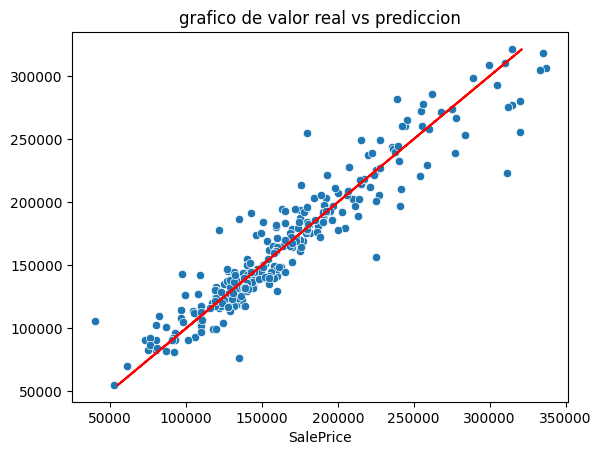

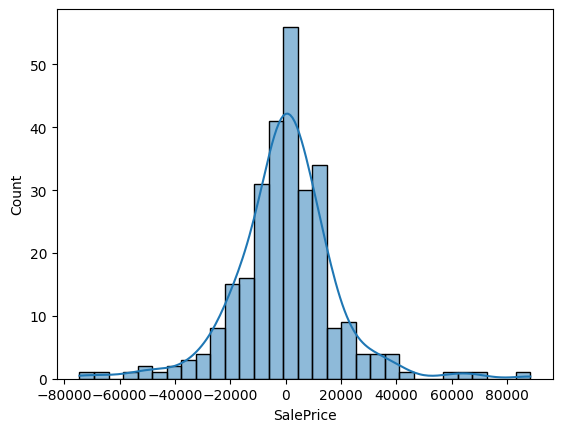

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

import xgboost as xgb 

#transformar las columnas
c_transformer = ColumnTransformer(
    transformers=[
        ('transform_1', MinMaxScaler(), numeric_columns[:-1]), # [:-1] porque no tiene que considerar el valor de la casa
        ('transform_2',OneHotEncoder(sparse_output=False,drop='first',dtype=int,categories='auto'),categoric_columns)
    ], remainder= 'passthrough'
)


X = data_clean.drop(['SalePrice'],axis=1)
X = c_transformer.fit_transform(X)

y = data_clean['SalePrice']

X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,test_size=0.2)

#hiperparametros del modelo
parametros = {
    'n_estimators' : 200,
    'learning_rate' : 0.1,
    'max_depth' : 5,
    'objective' : 'reg:squarederror'
}

#modelo 
model = xgb.XGBRegressor(**parametros).fit(X_train,y_train)
y_hat = model.predict(X_test)
rmse = mean_squared_error(y_test,y_hat,squared=False)

#resultados
print(model)
print(f"RMSE : {rmse}")

#plot resultados 
sns.scatterplot(x=y_test,y=y_hat)
plt.title("grafico de valor real vs prediccion")
plt.plot(y_hat,y_hat,c='r')
plt.show()

#residuos 
residuos = y_test - y_hat
sns.histplot(residuos,kde=True)
plt.show()